In [95]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [36]:
# Load data
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [37]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns

In [38]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [39]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [40]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [41]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [42]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [44]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [45]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

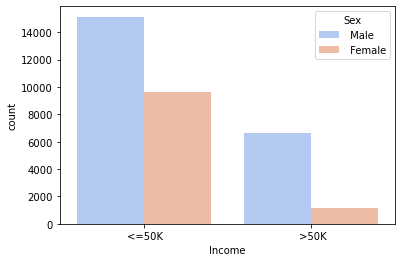

In [46]:
sns.countplot(df['Income'],palette='coolwarm',hue='Sex',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

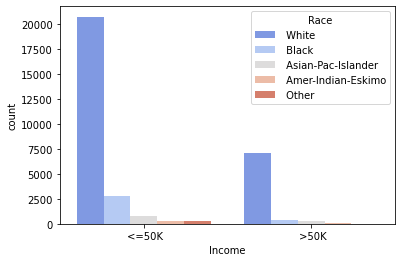

In [47]:
sns.countplot(df['Income'],palette='coolwarm',hue='Race',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

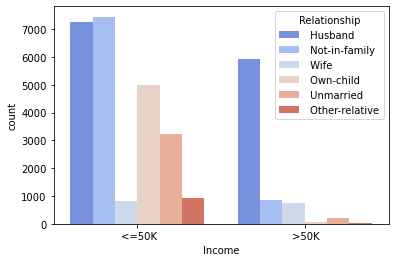

In [48]:
sns.countplot(df['Income'],palette='coolwarm',hue='Relationship',data=df)

In [49]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [50]:
# Catergorize the education, marital status,
df['Education']=df['Education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th'],'school',regex=True)
df['Education']=df['Education'].replace(['HS-grad','12th'],'Under Grad',regex=True)
df['Education']=df['Education'].replace(['Bachelors','Some-college','Assoc-voc','Assoc-acdm','Prof-school'],'Graduation',regex=True)
df['Education']=df['Education'].replace('Masters','Post grad',regex=True)

In [51]:
df['Marital_status']=df['Marital_status'].replace(['Never-married', 'Divorced','Separated','Widowed','Married-spouse-absent'],'not married',regex=True)
df['Marital_status']=df['Marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married',regex=True)

In [52]:
df.Income=df.Income.replace('<=50K',0,regex=True)
df.Income=df.Income.replace('>50K',1,regex=True)

In [53]:
df['Education'].value_counts()

 Graduation    15670
 Under Grad    10934
 school         3820
 Post grad      1723
 Doctorate       413
Name: Education, dtype: int64

In [54]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [55]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Graduation,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,Under Grad,9,not married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Graduation,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Post grad,14,married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


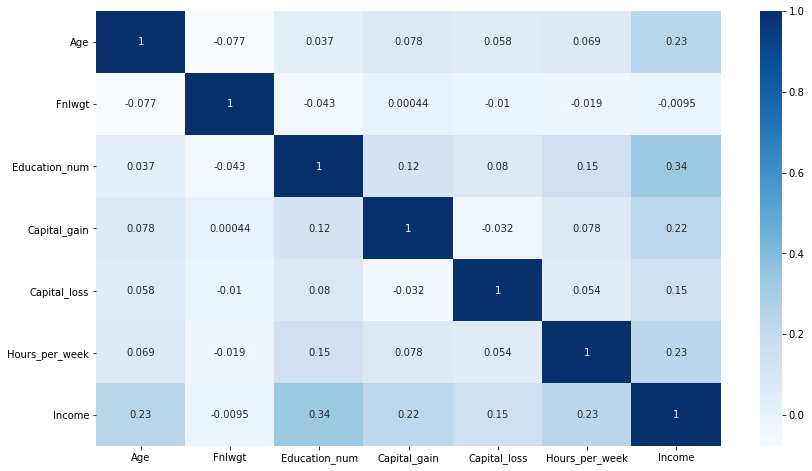

In [56]:
#Pearson Correlation
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues')
plt.show()

In [57]:
#Not very strong correlation observed among variables

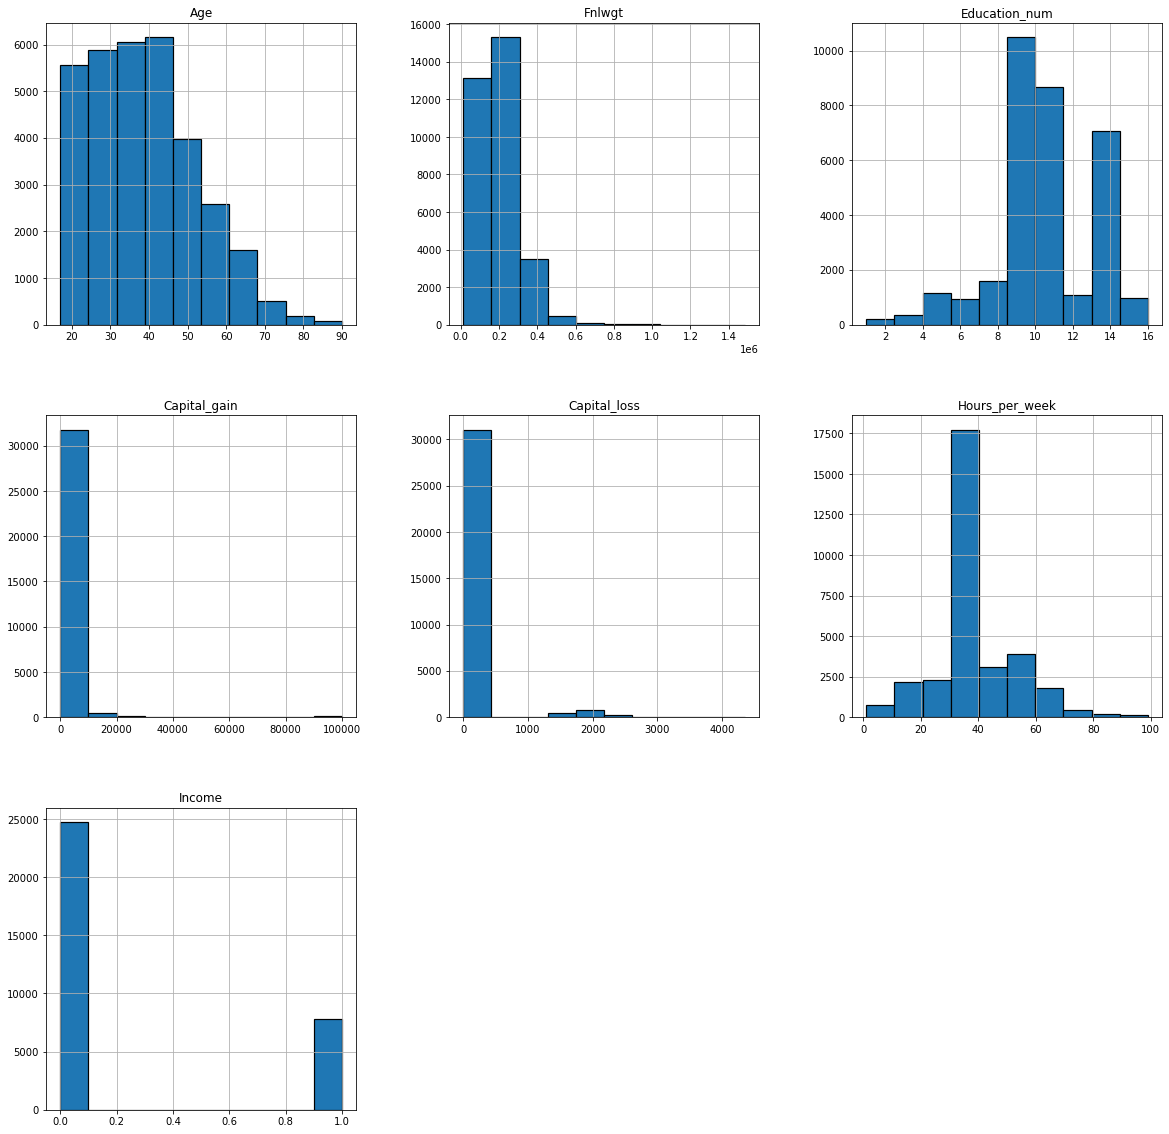

In [58]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [59]:
# The minimum age is 17 and the maximum is 90 years, most of the working age group lies between 20-40
#The minimum hours-per-week is 1 and maximum is 90, with most of the count lying between 30-40

Age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Education_num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Capital_gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Capital_loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Hours_per_week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Income                  AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

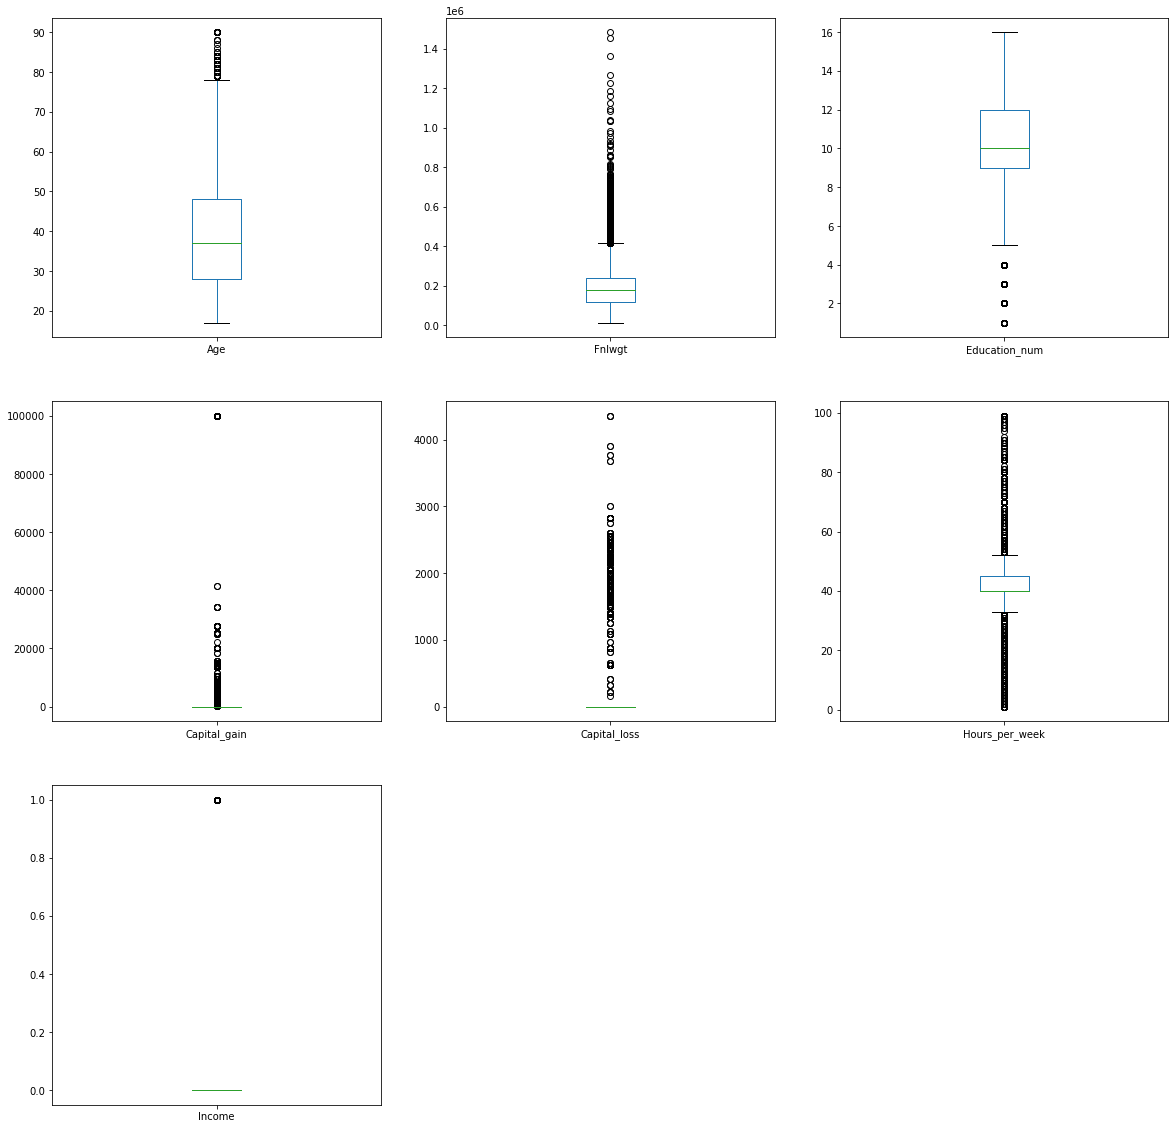

In [60]:
df.plot(kind='box', figsize=(20, 20),layout=(3,3),sharex=False,subplots=True)

In [61]:
# We can see almost all numerical columns contain outliers


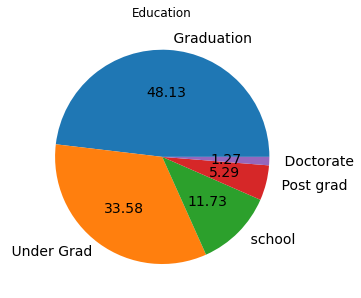

In [62]:
t = df['Education'].value_counts(normalize=True)
t.plot(kind='pie',
       figsize=(5,5),
       title='Education',
       ylabel="",
       autopct="%.2f",
       fontsize=14)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Race', ylabel='count'>

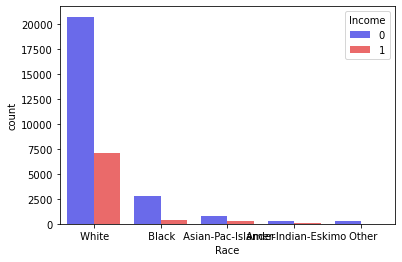

In [63]:
sns.countplot(df['Race'],hue='Income',data=df,palette='seismic')

In [65]:
#Creating our Model
X=df.drop(['Income'],axis=1)
y=df['Income']

In [66]:
#feature scaling
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [69]:
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,1,12,0,4,0,4,1,0,0,12,39,0
1,21,4,14085,3,8,1,6,1,4,1,0,0,39,39,0
2,36,4,15335,4,6,0,6,0,2,1,0,0,39,39,0
3,11,4,19354,1,12,0,10,5,2,0,0,0,39,5,0
4,20,4,17699,2,13,0,4,5,4,0,0,0,39,39,0


In [71]:
ss=StandardScaler().fit(df1.drop('Income',axis=1))

In [72]:
X=ss.transform(df1.drop('Income',axis=1))
y=df['Income']

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [87]:
#Logistic Regression
lr=LogisticRegression()

model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)

print("Acc to training data: {:,.3f}".format(lr.score(X_train,y_train)))
print("Acc to test data: {:,.3f}".format(lr.score(X_test,y_test)))

Acc to training data: 0.839
Acc to test data: 0.840


In [88]:
#Random Forest Classifier
rfc=RandomForestClassifier()

model1=rfc.fit(X_train,y_train)
prediction1=model1.predict(X_test)

print("Acc to training data: {:,.3f}".format(rfc.score(X_train,y_train)))
print("Acc to test data: {:,.3f}".format(rfc.score(X_test,y_test)))

Acc to training data: 1.000
Acc to test data: 0.859


In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [89]:
print(confusion_matrix(y_test,prediction1))

[[6923  489]
 [ 887 1469]]


In [90]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7412
           1       0.75      0.62      0.68      2356

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.85      0.86      0.85      9768



In [99]:
#Hyperparameter tuning
# Linear regression
lr_params = {'fit_intercept':[True,False]}


# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250]}


In [96]:
# searching Hyperparameters
regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = lr_params,
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
search = regressor.fit(X_train, y_train)
    
print('Best params :',search.best_params_)
print("RMSE :", -search.best_score_)


Best params : {'fit_intercept': True}
RMSE : 0.40088287774000175


In [100]:
# searching Hyperparameters
regressor = RandomizedSearchCV(estimator = model1,
                                   n_iter=10,
                                   param_distributions = rf_params,
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
search = regressor.fit(X_train, y_train)
    
print('Best params :',search.best_params_)
print("RMSE :", -search.best_score_)

Best params : {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
RMSE : 0.373844748144976


In [101]:
###Since Random Forest Classifier is performing better so it is selected

In [102]:
rf_params={'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}

model2=RandomForestClassifier(random_state=1, **rf_params)

In [103]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=1)

In [110]:
#save the model

import pickle
with open("model2.pkl", "wb") as f:
    pickle.dump(model2, f)